In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns',200)

In [22]:
df = pd.read_csv('matches.csv')

In [23]:
df.head()

Date   Time            Comp        Round  Day Venue Result   GF   GA  \
0  2022-08-05  20:00  Premier League  Matchweek 1  Fri  Away      W  2.0  0.0   
1  2022-08-13  15:00  Premier League  Matchweek 2  Sat  Home      W  4.0  2.0   
2  2022-08-20  17:30  Premier League  Matchweek 3  Sat  Away      W  3.0  0.0   
3  2022-08-27  17:30  Premier League  Matchweek 4  Sat  Home      W  2.0  1.0   
4  2022-08-31  19:30  Premier League  Matchweek 5  Wed  Home      W  2.0  1.0   

         Opponent   xG  xGA  Poss  Attendance          Captain Formation  \
0  Crystal Palace  1.0  1.2  44.0     25286.0  Martin Ødegaard     4-3-3   
1  Leicester City  2.7  0.5  50.0     60033.0  Martin Ødegaard   4-2-3-1   
2     Bournemouth  1.3  0.3  57.0     10423.0  Martin Ødegaard   4-2-3-1   
3          Fulham  2.6  0.8  71.0     60164.0  Martin Ødegaard   4-2-3-1   
4     Aston Villa  2.4  0.4  59.0     60012.0  Martin Ødegaard   4-2-3-1   

          Referee  Match Report  Notes    Sh  SoT  Dist   FK   PK  PKatt  \
0  Anthony Taylor  Match Report    NaN  10.0  2.0  14.6  1.0  0.0    0.0   
1  Darren England  Match Report    NaN  19.0  7.0  13.0  0.0  0.0    0.0   
2    Craig Pawson  Match Report    NaN  14.0  6.0  14.8  0.0  0.0    0.0   
3  Jarred Gillett  Match Report    NaN  22.0  8.0  15.5  1.0  0.0    0.0   
4    Robert Jones  Match Report    NaN  22.0  8.0  16.3  1.0  0.0    0.0   

   Season     Team  
0    2023  Arsenal  
1    2023  Arsenal  
2    2023  Arsenal  
3    2023  Arsenal  
4    2023  Arsenal

In [24]:
df.isnull().sum()

Date               0
Time               0
Comp               0
Round              0
Day                0
Venue              0
Result             0
GF                 0
GA                 0
Opponent           0
xG                 0
xGA                0
Poss               0
Attendance      1764
Captain            0
Formation          0
Referee            0
Match Report       0
Notes           8064
Sh                 0
SoT                0
Dist               6
FK                 0
PK                 0
PKatt              0
Season             0
Team               0
dtype: int64

In [14]:
df.shape

(8064, 27)

In [16]:
df.drop('Notes',inplace=True,axis = 1)

In [25]:
df['Team'].value_counts()

Leicester City              404
Tottenham Hotspur           404
Newcastle United            404
West Ham United             404
Everton                     404
Southampton                 404
Arsenal                     402
Chelsea                     402
Manchester United           402
Liverpool                   402
Brighton and Hove Albion    402
Crystal Palace              402
Manchester City             402
Burnley                     380
Wolverhampton Wanderers     328
Watford                     304
Aston Villa                 252
Bournemouth                 252
Fulham                      176
Leeds United                174
Norwich City                152
West Bromwich Albion        152
Sheffield United            152
Huddersfield Town           152
Brentford                   100
Cardiff City                 76
Swansea City                 76
Stoke City                   76
Nottingham Forest            24
Name: Team, dtype: int64

In [26]:
df['Attendance'].value_counts()

2000.0     52
10000.0    28
24121.0    16
8000.0     16
24169.0    12
           ..
53323.0     4
21634.0     4
53313.0     4
27110.0     4
29057.0     4
Name: Attendance, Length: 1466, dtype: int64

In [27]:
df['Round'].value_counts()

Matchweek 1     240
Matchweek 9     240
Matchweek 2     240
Matchweek 13    240
Matchweek 11    240
Matchweek 10    240
Matchweek 6     240
Matchweek 5     240
Matchweek 4     240
Matchweek 3     240
Matchweek 12    236
Matchweek 8     228
Matchweek 30    200
Matchweek 28    200
Matchweek 29    200
Matchweek 31    200
Matchweek 32    200
Matchweek 37    200
Matchweek 34    200
Matchweek 35    200
Matchweek 36    200
Matchweek 33    200
Matchweek 26    200
Matchweek 27    200
Matchweek 20    200
Matchweek 25    200
Matchweek 24    200
Matchweek 23    200
Matchweek 22    200
Matchweek 21    200
Matchweek 19    200
Matchweek 18    200
Matchweek 17    200
Matchweek 16    200
Matchweek 15    200
Matchweek 14    200
Matchweek 7     200
Matchweek 38    200
Name: Round, dtype: int64

In [30]:
df = df.drop('Notes',axis=1)

In [32]:
df.columns

Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Referee', 'Match Report', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt',
       'Season', 'Team'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8064 non-null   object 
 1   Time          8064 non-null   object 
 2   Comp          8064 non-null   object 
 3   Round         8064 non-null   object 
 4   Day           8064 non-null   object 
 5   Venue         8064 non-null   object 
 6   Result        8064 non-null   object 
 7   GF            8064 non-null   float64
 8   GA            8064 non-null   float64
 9   Opponent      8064 non-null   object 
 10  xG            8064 non-null   float64
 11  xGA           8064 non-null   float64
 12  Poss          8064 non-null   float64
 13  Attendance    6300 non-null   float64
 14  Captain       8064 non-null   object 
 15  Formation     8064 non-null   object 
 16  Referee       8064 non-null   object 
 17  Match Report  8064 non-null   object 
 18  Sh            8064 non-null 

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

In [37]:
df['Venue_code'] = df['Venue'].astype('category').cat.codes

In [38]:
df.head()

Date   Time            Comp        Round  Day Venue Result   GF   GA  \
0 2022-08-05  20:00  Premier League  Matchweek 1  Fri  Away      W  2.0  0.0   
1 2022-08-13  15:00  Premier League  Matchweek 2  Sat  Home      W  4.0  2.0   
2 2022-08-20  17:30  Premier League  Matchweek 3  Sat  Away      W  3.0  0.0   
3 2022-08-27  17:30  Premier League  Matchweek 4  Sat  Home      W  2.0  1.0   
4 2022-08-31  19:30  Premier League  Matchweek 5  Wed  Home      W  2.0  1.0   

         Opponent   xG  xGA  Poss  Attendance          Captain Formation  \
0  Crystal Palace  1.0  1.2  44.0     25286.0  Martin Ødegaard     4-3-3   
1  Leicester City  2.7  0.5  50.0     60033.0  Martin Ødegaard   4-2-3-1   
2     Bournemouth  1.3  0.3  57.0     10423.0  Martin Ødegaard   4-2-3-1   
3          Fulham  2.6  0.8  71.0     60164.0  Martin Ødegaard   4-2-3-1   
4     Aston Villa  2.4  0.4  59.0     60012.0  Martin Ødegaard   4-2-3-1   

          Referee  Match Report    Sh  SoT  Dist   FK   PK  PKatt  Season  \
0  Anthony Taylor  Match Report  10.0  2.0  14.6  1.0  0.0    0.0    2023   
1  Darren England  Match Report  19.0  7.0  13.0  0.0  0.0    0.0    2023   
2    Craig Pawson  Match Report  14.0  6.0  14.8  0.0  0.0    0.0    2023   
3  Jarred Gillett  Match Report  22.0  8.0  15.5  1.0  0.0    0.0    2023   
4    Robert Jones  Match Report  22.0  8.0  16.3  1.0  0.0    0.0    2023   

      Team  Venue_code  
0  Arsenal           0  
1  Arsenal           1  
2  Arsenal           0  
3  Arsenal           1  
4  Arsenal           1

In [41]:
df['Opponent_code'] = df['Opponent'].astype('category').cat.codes

In [42]:
df.head()

Date   Time            Comp        Round  Day Venue Result   GF   GA  \
0 2022-08-05  20:00  Premier League  Matchweek 1  Fri  Away      W  2.0  0.0   
1 2022-08-13  15:00  Premier League  Matchweek 2  Sat  Home      W  4.0  2.0   
2 2022-08-20  17:30  Premier League  Matchweek 3  Sat  Away      W  3.0  0.0   
3 2022-08-27  17:30  Premier League  Matchweek 4  Sat  Home      W  2.0  1.0   
4 2022-08-31  19:30  Premier League  Matchweek 5  Wed  Home      W  2.0  1.0   

         Opponent   xG  xGA  Poss  Attendance          Captain Formation  \
0  Crystal Palace  1.0  1.2  44.0     25286.0  Martin Ødegaard     4-3-3   
1  Leicester City  2.7  0.5  50.0     60033.0  Martin Ødegaard   4-2-3-1   
2     Bournemouth  1.3  0.3  57.0     10423.0  Martin Ødegaard   4-2-3-1   
3          Fulham  2.6  0.8  71.0     60164.0  Martin Ødegaard   4-2-3-1   
4     Aston Villa  2.4  0.4  59.0     60012.0  Martin Ødegaard   4-2-3-1   

          Referee  Match Report    Sh  SoT  Dist   FK   PK  PKatt  Season  \
0  Anthony Taylor  Match Report  10.0  2.0  14.6  1.0  0.0    0.0    2023   
1  Darren England  Match Report  19.0  7.0  13.0  0.0  0.0    0.0    2023   
2    Craig Pawson  Match Report  14.0  6.0  14.8  0.0  0.0    0.0    2023   
3  Jarred Gillett  Match Report  22.0  8.0  15.5  1.0  0.0    0.0    2023   
4    Robert Jones  Match Report  22.0  8.0  16.3  1.0  0.0    0.0    2023   

      Team  Venue_code  Opponent_code  
0  Arsenal           0              8  
1  Arsenal           1             13  
2  Arsenal           0              2  
3  Arsenal           1             10  
4  Arsenal           1              1

In [43]:
df['Time']

0       20:00
1       15:00
2       17:30
3       17:30
4       19:30
        ...  
8059    16:00
8060    12:30
8061    15:00
8062    15:00
8063    15:00
Name: Time, Length: 8064, dtype: object

In [45]:
df['Hour'] = df['Time'].str.replace(':.+','',regex=True)

In [46]:
df['Hour'] = df['Hour'].astype(int)

In [47]:
df.head()

Date   Time            Comp        Round  Day Venue Result   GF   GA  \
0 2022-08-05  20:00  Premier League  Matchweek 1  Fri  Away      W  2.0  0.0   
1 2022-08-13  15:00  Premier League  Matchweek 2  Sat  Home      W  4.0  2.0   
2 2022-08-20  17:30  Premier League  Matchweek 3  Sat  Away      W  3.0  0.0   
3 2022-08-27  17:30  Premier League  Matchweek 4  Sat  Home      W  2.0  1.0   
4 2022-08-31  19:30  Premier League  Matchweek 5  Wed  Home      W  2.0  1.0   

         Opponent   xG  xGA  Poss  Attendance          Captain Formation  \
0  Crystal Palace  1.0  1.2  44.0     25286.0  Martin Ødegaard     4-3-3   
1  Leicester City  2.7  0.5  50.0     60033.0  Martin Ødegaard   4-2-3-1   
2     Bournemouth  1.3  0.3  57.0     10423.0  Martin Ødegaard   4-2-3-1   
3          Fulham  2.6  0.8  71.0     60164.0  Martin Ødegaard   4-2-3-1   
4     Aston Villa  2.4  0.4  59.0     60012.0  Martin Ødegaard   4-2-3-1   

          Referee  Match Report    Sh  SoT  Dist   FK   PK  PKatt  Season  \
0  Anthony Taylor  Match Report  10.0  2.0  14.6  1.0  0.0    0.0    2023   
1  Darren England  Match Report  19.0  7.0  13.0  0.0  0.0    0.0    2023   
2    Craig Pawson  Match Report  14.0  6.0  14.8  0.0  0.0    0.0    2023   
3  Jarred Gillett  Match Report  22.0  8.0  15.5  1.0  0.0    0.0    2023   
4    Robert Jones  Match Report  22.0  8.0  16.3  1.0  0.0    0.0    2023   

      Team  Venue_code  Opponent_code  Hour  
0  Arsenal           0              8    20  
1  Arsenal           1             13    15  
2  Arsenal           0              2    17  
3  Arsenal           1             10    17  
4  Arsenal           1              1    19

In [48]:
 df['Day_code'] = df['Date'].dt.dayofweek

In [49]:
df.head()

Date   Time            Comp        Round  Day Venue Result   GF   GA  \
0 2022-08-05  20:00  Premier League  Matchweek 1  Fri  Away      W  2.0  0.0   
1 2022-08-13  15:00  Premier League  Matchweek 2  Sat  Home      W  4.0  2.0   
2 2022-08-20  17:30  Premier League  Matchweek 3  Sat  Away      W  3.0  0.0   
3 2022-08-27  17:30  Premier League  Matchweek 4  Sat  Home      W  2.0  1.0   
4 2022-08-31  19:30  Premier League  Matchweek 5  Wed  Home      W  2.0  1.0   

         Opponent   xG  xGA  Poss  Attendance          Captain Formation  \
0  Crystal Palace  1.0  1.2  44.0     25286.0  Martin Ødegaard     4-3-3   
1  Leicester City  2.7  0.5  50.0     60033.0  Martin Ødegaard   4-2-3-1   
2     Bournemouth  1.3  0.3  57.0     10423.0  Martin Ødegaard   4-2-3-1   
3          Fulham  2.6  0.8  71.0     60164.0  Martin Ødegaard   4-2-3-1   
4     Aston Villa  2.4  0.4  59.0     60012.0  Martin Ødegaard   4-2-3-1   

          Referee  Match Report    Sh  SoT  Dist   FK   PK  PKatt  Season  \
0  Anthony Taylor  Match Report  10.0  2.0  14.6  1.0  0.0    0.0    2023   
1  Darren England  Match Report  19.0  7.0  13.0  0.0  0.0    0.0    2023   
2    Craig Pawson  Match Report  14.0  6.0  14.8  0.0  0.0    0.0    2023   
3  Jarred Gillett  Match Report  22.0  8.0  15.5  1.0  0.0    0.0    2023   
4    Robert Jones  Match Report  22.0  8.0  16.3  1.0  0.0    0.0    2023   

      Team  Venue_code  Opponent_code  Hour  Day_code  
0  Arsenal           0              8    20         4  
1  Arsenal           1             13    15         5  
2  Arsenal           0              2    17         5  
3  Arsenal           1             10    17         5  
4  Arsenal           1              1    19         2

In [51]:
df['Target'] = (df['Result'] == 'W').astype(int)

In [52]:
df.head()

Date   Time            Comp        Round  Day Venue Result   GF   GA  \
0 2022-08-05  20:00  Premier League  Matchweek 1  Fri  Away      W  2.0  0.0   
1 2022-08-13  15:00  Premier League  Matchweek 2  Sat  Home      W  4.0  2.0   
2 2022-08-20  17:30  Premier League  Matchweek 3  Sat  Away      W  3.0  0.0   
3 2022-08-27  17:30  Premier League  Matchweek 4  Sat  Home      W  2.0  1.0   
4 2022-08-31  19:30  Premier League  Matchweek 5  Wed  Home      W  2.0  1.0   

         Opponent   xG  xGA  Poss  Attendance          Captain Formation  \
0  Crystal Palace  1.0  1.2  44.0     25286.0  Martin Ødegaard     4-3-3   
1  Leicester City  2.7  0.5  50.0     60033.0  Martin Ødegaard   4-2-3-1   
2     Bournemouth  1.3  0.3  57.0     10423.0  Martin Ødegaard   4-2-3-1   
3          Fulham  2.6  0.8  71.0     60164.0  Martin Ødegaard   4-2-3-1   
4     Aston Villa  2.4  0.4  59.0     60012.0  Martin Ødegaard   4-2-3-1   

          Referee  Match Report    Sh  SoT  Dist   FK   PK  PKatt  Season  \
0  Anthony Taylor  Match Report  10.0  2.0  14.6  1.0  0.0    0.0    2023   
1  Darren England  Match Report  19.0  7.0  13.0  0.0  0.0    0.0    2023   
2    Craig Pawson  Match Report  14.0  6.0  14.8  0.0  0.0    0.0    2023   
3  Jarred Gillett  Match Report  22.0  8.0  15.5  1.0  0.0    0.0    2023   
4    Robert Jones  Match Report  22.0  8.0  16.3  1.0  0.0    0.0    2023   

      Team  Venue_code  Opponent_code  Hour  Day_code  Target  
0  Arsenal           0              8    20         4       1  
1  Arsenal           1             13    15         5       1  
2  Arsenal           0              2    17         5       1  
3  Arsenal           1             10    17         5       1  
4  Arsenal           1              1    19         2       1

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8064 non-null   datetime64[ns]
 1   Time           8064 non-null   object        
 2   Comp           8064 non-null   object        
 3   Round          8064 non-null   object        
 4   Day            8064 non-null   object        
 5   Venue          8064 non-null   object        
 6   Result         8064 non-null   object        
 7   GF             8064 non-null   float64       
 8   GA             8064 non-null   float64       
 9   Opponent       8064 non-null   object        
 10  xG             8064 non-null   float64       
 11  xGA            8064 non-null   float64       
 12  Poss           8064 non-null   float64       
 13  Attendance     6300 non-null   float64       
 14  Captain        8064 non-null   object        
 15  Formation      8064 n

In [61]:
df['Attendance'] = df['Attendance'].fillna(df['Attendance'].mean())
df['Dist'] = df['Dist'].fillna(df['Dist'].mean())

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8064 non-null   datetime64[ns]
 1   Time           8064 non-null   object        
 2   Comp           8064 non-null   object        
 3   Round          8064 non-null   object        
 4   Day            8064 non-null   object        
 5   Venue          8064 non-null   object        
 6   Result         8064 non-null   object        
 7   GF             8064 non-null   float64       
 8   GA             8064 non-null   float64       
 9   Opponent       8064 non-null   object        
 10  xG             8064 non-null   float64       
 11  xGA            8064 non-null   float64       
 12  Poss           8064 non-null   float64       
 13  Attendance     8064 non-null   float64       
 14  Captain        8064 non-null   object        
 15  Formation      8064 n

In [64]:
df.describe().T

count          mean           std     min      25%  \
GF             8064.0      1.375248      1.277288     0.0      0.0   
GA             8064.0      1.375248      1.277288     0.0      0.0   
xG             8064.0      1.345759      0.798518     0.0      0.7   
xGA            8064.0      1.345759      0.798518     0.0      0.7   
Poss           8064.0     50.001240     12.737740    18.0     41.0   
Attendance     8064.0  38173.725079  15056.659581  2000.0  29314.0   
Sh             8064.0     12.312500      5.423507     0.0      8.0   
SoT            8064.0      4.097222      2.437963     0.0      2.0   
Dist           8064.0     17.684413      3.036980     5.3     15.7   
FK             8064.0      0.461806      0.678531     0.0      0.0   
PK             8064.0      0.104663      0.322704     0.0      0.0   
PKatt          8064.0      0.132440      0.361648     0.0      0.0   
Season         8064.0   2020.172619      1.540544  2018.0   2019.0   
Venue_code     8064.0      0.500000      0.500031     0.0      0.0   
Opponent_code  8064.0     13.627480      8.412715     0.0      7.0   
Hour           8064.0     16.072421      2.428634    12.0     15.0   
Day_code       8064.0      4.376984      1.784285     0.0      4.0   
Target         8064.0      0.384921      0.486607     0.0      0.0   

                        50%       75%      max  
GF                 1.000000      2.00      9.0  
GA                 1.000000      2.00      9.0  
xG                 1.200000      1.80      5.9  
xGA                1.200000      1.80      5.9  
Poss              50.000000     59.00     82.0  
Attendance     38173.725079  50753.25  83222.0  
Sh                12.000000     16.00     36.0  
SoT                4.000000      6.00     15.0  
Dist              17.600000     19.50     35.0  
FK                 0.000000      1.00      6.0  
PK                 0.000000      0.00      3.0  
PKatt              0.000000      0.00      3.0  
Season          2020.000000   2021.00   2023.0  
Venue_code         0.500000      1.00      1.0  
Opponent_code     14.000000     21.00     28.0  
Hour              15.000000     18.00     20.0  
Day_code           5.000000      6.00      6.0  
Target             0.000000      1.00      1.0

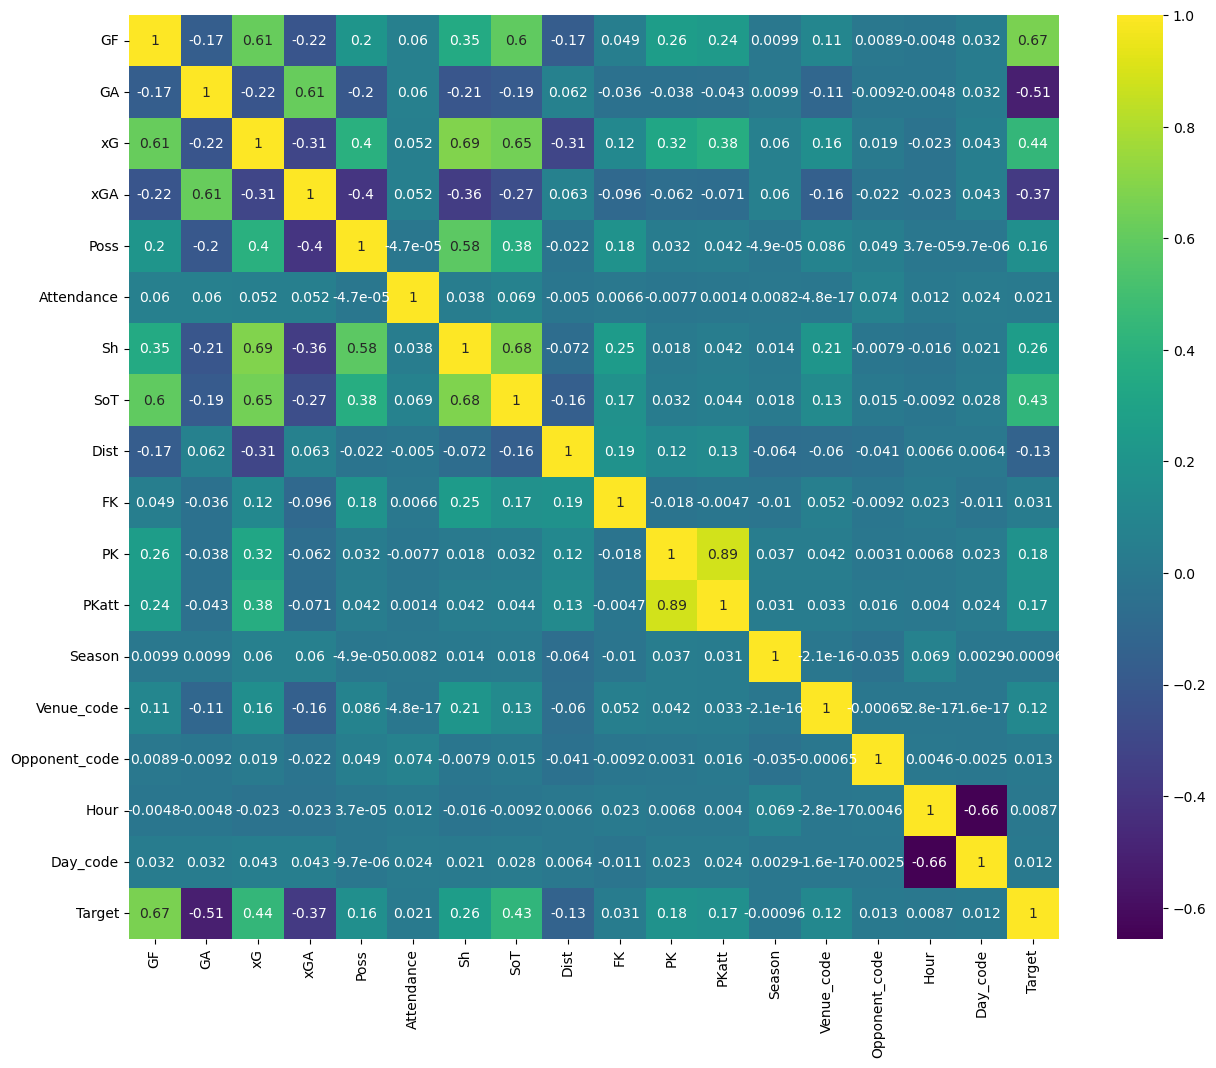

In [68]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

<Figure size 3000x3000 with 0 Axes>

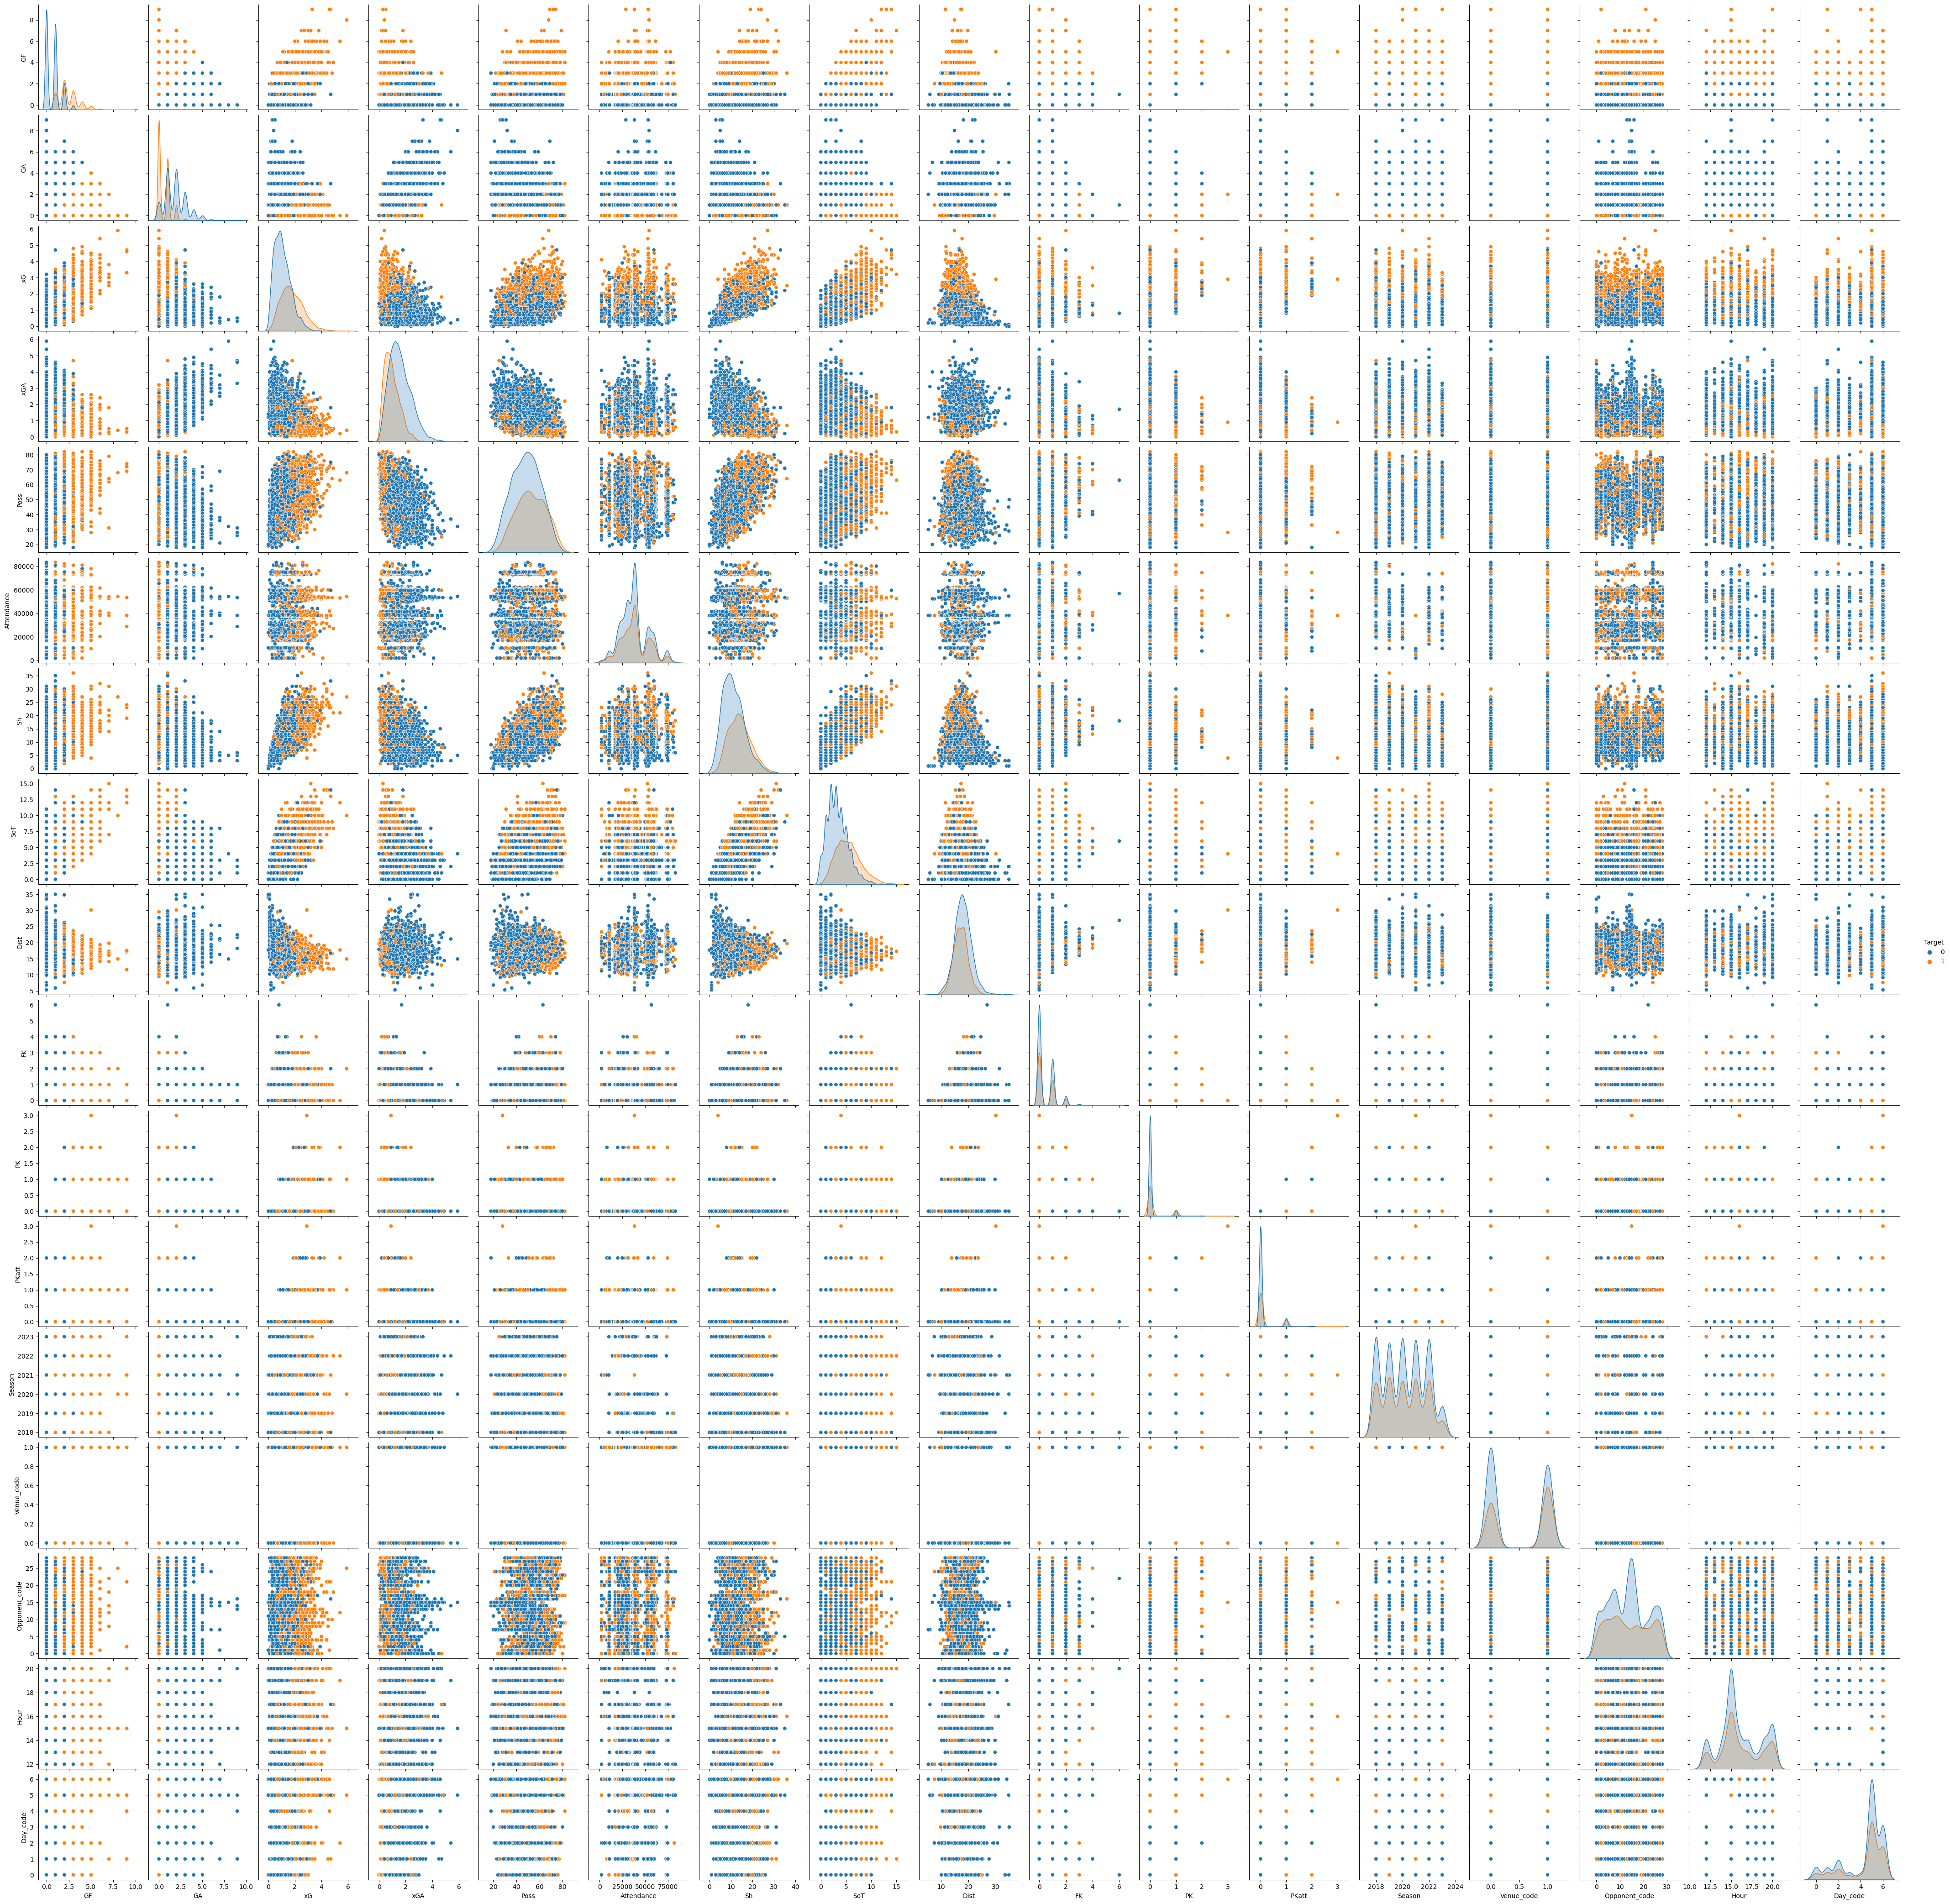

In [70]:
plt.figure(figsize=(15,15),dpi=200)
sns.pairplot(df,hue="Target")
plt.show()

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [71]:
model = RandomForestClassifier()

In [72]:
df.columns

Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Referee', 'Match Report', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt',
       'Season', 'Team', 'Venue_code', 'Opponent_code', 'Hour', 'Day_code',
       'Target'],
      dtype='object')

In [86]:
train = df[df['Date']< '2022-01-01']
test = df[df['Date']> '2022-01-01']
predictors = ['Venue_code', 'Opponent_code', 'Hour', 'Day_code']
param_grid = {'n_estimators':[50,100,1000,150,200,300,400,500],'min_samples_leaf':[10,20,30,5,15,25],'criterion':['gini','entropy']}

In [87]:
model.fit(train[predictors],train['Target'])

RandomForestClassifier()

In [88]:
preds = model.predict(test[predictors])

In [89]:
print(classification_report(test["Target"],preds))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       760
           1       0.52      0.38      0.44       480

    accuracy                           0.63      1240
   macro avg       0.59      0.58      0.58      1240
weighted avg       0.61      0.63      0.61      1240



In [90]:
grid_model = GridSearchCV(model,param_grid=param_grid)
grid_model.fit(train[predictors],train['Target'])

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [10, 20, 30, 5, 15, 25],
                         'n_estimators': [50, 100, 1000, 150, 200, 300, 400,
                                          500]})

In [91]:
preds_grid = grid_model.predict(test[predictors])
print(classification_report(test["Target"],preds_grid))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       760
           1       0.54      0.37      0.44       480

    accuracy                           0.63      1240
   macro avg       0.60      0.59      0.58      1240
weighted avg       0.62      0.63      0.62      1240

